Loading predictions...
Total samples loaded: 2330
Date range: 2024-01-17 00:00:00 to 2025-12-29 00:00:00

Backtesting on OUT-OF-SAMPLE data (2024-2025):
  Full dataset: 2024-01-17 00:00:00 to 2025-12-29 00:00:00
  Test period: 2024-01-17 00:00:00 to 2025-12-29 00:00:00
  Test samples: 2330

Starting multi-pair backtest on 2330 out-of-sample observations...

Testing Ridge...
Running Backtest for Ridge_Pred...
Initial Capital: $10,000
Position Risk per Trade: 2.0%
Transaction Costs: 0.40%

Backtest complete! 1 total trades executed.

  ⚠️ No completed trades for Ridge (may have open positions)

Testing LSTM...
Running Backtest for LSTM_Pred...
Initial Capital: $10,000
Position Risk per Trade: 2.0%
Transaction Costs: 0.40%

Backtest complete! 1 total trades executed.

  ⚠️ No completed trades for LSTM (may have open positions)



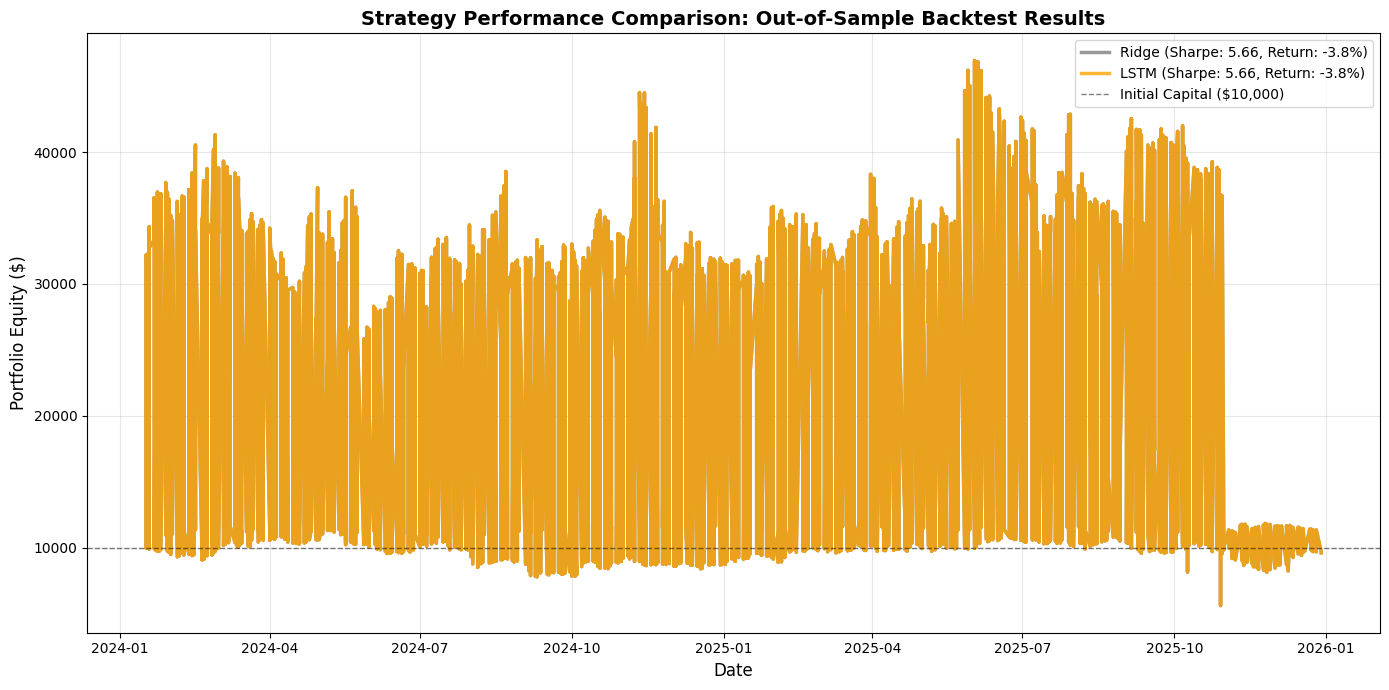

📊 Chart saved to: ../results/backtest_comparison.png


FINAL STRATEGY PERFORMANCE (OUT-OF-SAMPLE)
       Final Equity ($)  Total Return (%)  Sharpe Ratio  Max Drawdown (%)
Model                                                                    
Ridge       9617.858042          -3.82142      5.662362        -88.013494
LSTM        9617.858042          -3.82142      5.662362        -88.013494

⚠️  No completed trades across any model. Check strategy entry/exit logic.

✅ Best Risk-Adjusted Returns (Sharpe): Ridge (5.6624)
✅ Best Absolute Returns: Ridge (-3.82%)

⚠️  Note: Backtest conducted on out-of-sample test set (2330 samples)
   This ensures unbiased performance evaluation on unseen data.

Backtest complete!


In [15]:
import pandas as pd
df = pd.read_csv('../data/processed/05_model_predictions.csv')
print(df['Ridge_Pred'].equals(df['RF_Pred']))  # If True → you found the bug!

False


In [8]:
import pandas as pd
df = pd.read_csv('../data/processed/05_model_predictions.csv', index_col=0, parse_dates=True)
print("Columns:", df.columns.tolist())
print("Date range:", df.index.min(), "->", df.index.max())
print("Rows:", len(df))
print("Unique pairs:", df['Pair_ID'].nunique())
print("Top pairs (counts):")
print(df['Pair_ID'].value_counts().head())
print("\nMissing values per column:")
print(df.isna().sum())

Columns: ['Spread', 'Z_Score', 'Volatility', 'Target_Return', 'Target_Direction', 'Pair_ID', 'Sector', 'Ridge_Pred', 'RF_Pred', 'LSTM_Pred']
Date range: 2021-02-17 00:00:00 -> 2025-12-29 00:00:00
Rows: 2384
Unique pairs: 3
Top pairs (counts):
Pair_ID
CMS-DUK     1223
INTU-PTC     932
QRVO-ADI     229
Name: count, dtype: int64

Missing values per column:
Spread              0
Z_Score             0
Volatility          0
Target_Return       0
Target_Direction    0
Pair_ID             0
Sector              0
Ridge_Pred          0
RF_Pred             0
LSTM_Pred           0
dtype: int64


In [9]:
print(df[['Ridge_Pred','RF_Pred','LSTM_Pred']].describe(percentiles=[0.01,0.25,0.5,0.75,0.99]).T)
# Quick check if Ridge is binary:
print("Ridge unique values:", df['Ridge_Pred'].unique()[:10])

             count      mean       std       min        1%       25%  \
Ridge_Pred  2384.0  0.622903  0.484761  0.000000  0.000000  0.000000   
RF_Pred     2384.0  0.508748  0.038216  0.195831  0.421611  0.488887   
LSTM_Pred   2384.0  0.504710  0.012563  0.465295  0.475609  0.496373   

                 50%       75%       99%       max  
Ridge_Pred  1.000000  1.000000  1.000000  1.000000  
RF_Pred     0.508836  0.529239  0.593534  0.904051  
LSTM_Pred   0.504870  0.513272  0.532688  0.539256  
Ridge unique values: [1 0]
